# KNN Classification 

The KNN classification problem statement on the Iris dataset involves using the KNN algorithm to classify the species of iris plants (Iris Setosa, Iris Versicolor, and Iris Virginica) based on their sepal length, sepal width, petal length, and petal width. The goal is to build a model that can accurately predict the species of a new iris plant based on its measurements. The Iris dataset is commonly used as a beginner's dataset for machine learning classification problems.

In [1]:
# importing the necessary library and loading the data 
import pandas as pd
import numpy as np
 

iris = pd.read_csv('iris.csv')
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
# displaying the first 5 rows 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# displaying the last 5 rows
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# checking for null values
iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [5]:
# displaying the summary statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# checking the data types 
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# dropping the ID column
iris=iris.drop('Id', axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Calculate the distribution of your target variable
class_counts = iris['Species'].value_counts()

# Print the number of samples in each class
print(class_counts)

# Check if the dataset is balanced or not
if ((class_counts.max() / class_counts.sum()) > 0.75):
    print("Dataset is imbalanced")
else:
    print("Dataset is balanced")

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
Dataset is balanced


In [9]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
# conversion datatypes for Species
iris['Species'] = iris['Species'].astype('category')

iris.dtypes

SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

# Visualization

In [11]:
# importing necessary library
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:ylabel='Frequency'>

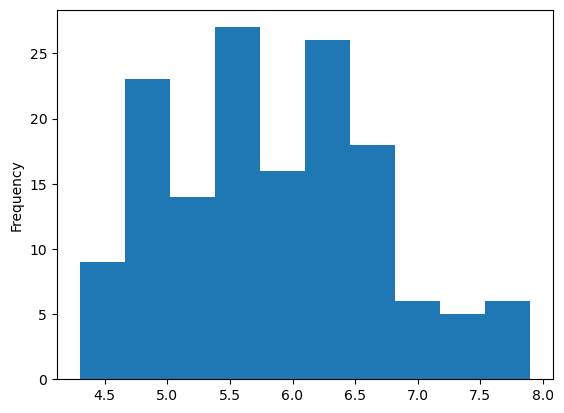

In [12]:
# histogram of SepalLengthCm
iris['SepalLengthCm'].plot.hist()

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

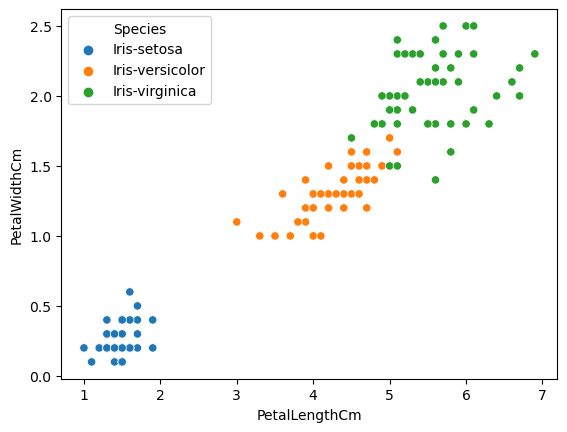

In [13]:
# scatterplot of PetalLengthCm vs. PetalWidthCm by Species
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris)

<AxesSubplot:xlabel='Species'>

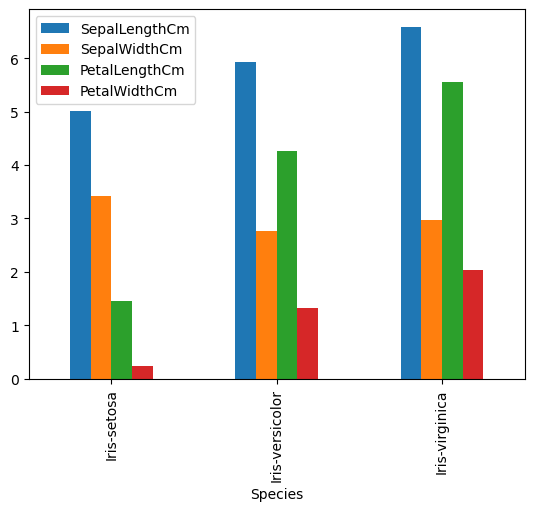

In [14]:
# barplot of the mean values of each numeric column by Species
iris.groupby('Species').mean().plot.bar()

<AxesSubplot:xlabel='SepalLengthCm'>

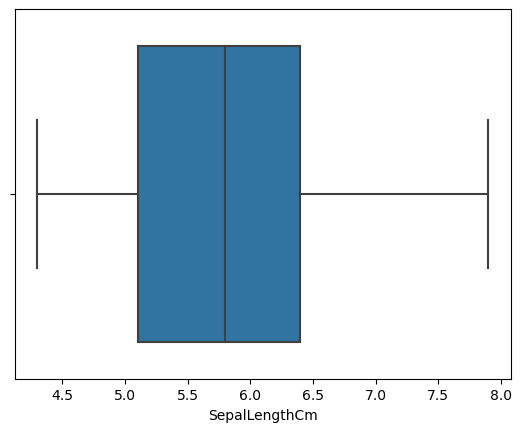

In [15]:
# box plot for SepalLengthCm
sns.boxplot(iris.SepalLengthCm)

<AxesSubplot:xlabel='SepalWidthCm'>

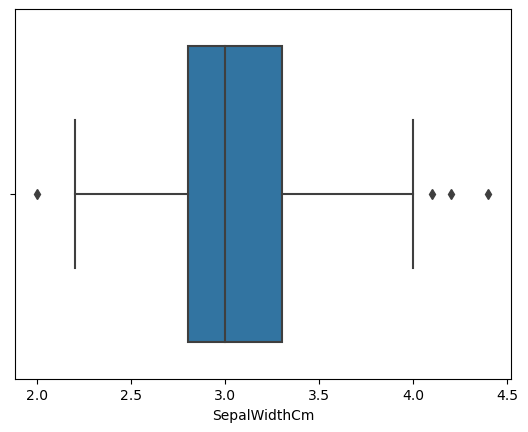

In [16]:
# blox plot for SepalWidthCm
sns.boxplot(iris.SepalWidthCm)

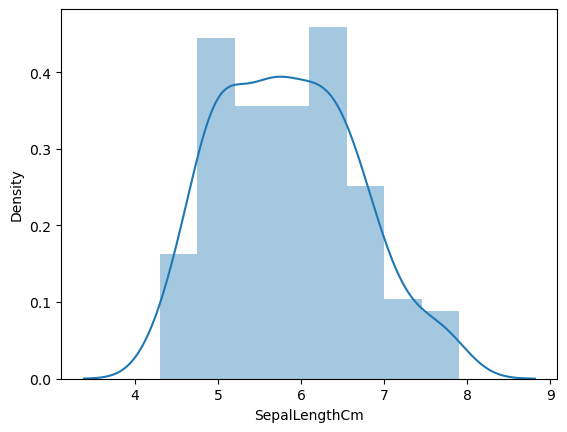

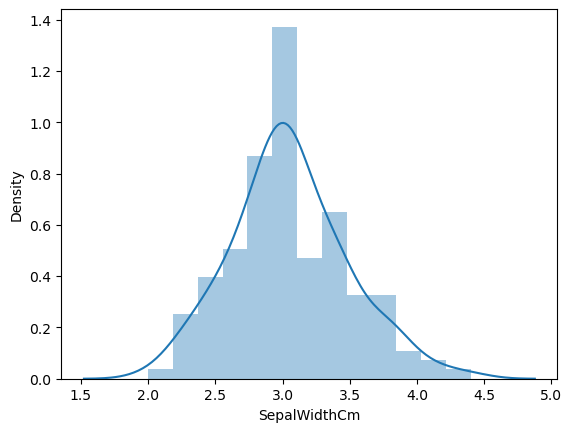

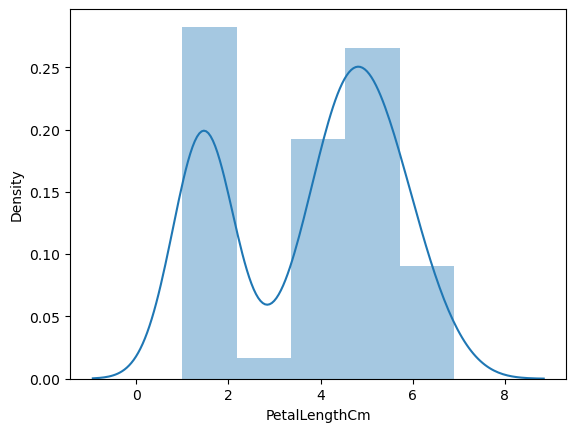

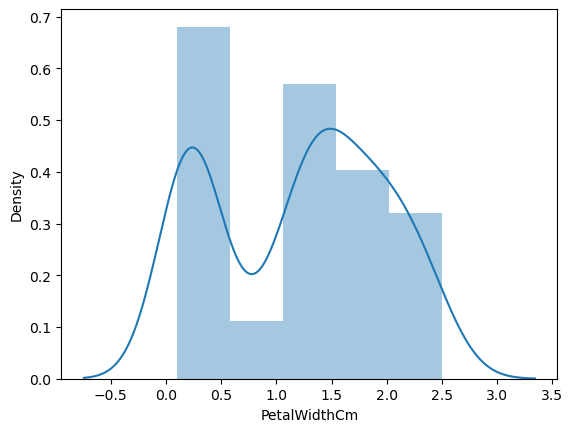

In [17]:
cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in cols:
    sns.distplot(iris[i])
    plt.show()

In [18]:
# Split features and labels
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values


In [19]:
import random
import math
import numpy as np

# Concatenate features and labels into a single dataset
dataset = list(zip(X, y))

# Set the random seed for reproducibility
random.seed(1)

# Shuffle the dataset
random.shuffle(dataset)


# Split the dataset into training, validation, and test sets
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set = dataset[:train_size]
val_set = dataset[train_size:train_size+val_size]
test_set = dataset[train_size+val_size:]
X_train, y_train = zip(*train_set)
X_val, y_val = zip(*val_set)
X_test, y_test = zip(*test_set)




# Define the Euclidean distance function
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

# Define the function to get the k nearest neighbors
def get_neighbors(training_set, test_instance, k):
    distances = []
    for i in range(len(training_set)):
        dist = euclidean_distance(test_instance, training_set[i][0])
        distances.append((training_set[i], dist))
    distances.sort(key=lambda x: x[1])
    neighbors = [distances[i][0] for i in range(k)]
    return neighbors

# Define the function to get the majority vote
def get_majority_vote(neighbors):
    class_votes = {}
    for i in range(len(neighbors)):
        label = neighbors[i][-1]
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
    return sorted_votes[0][0]

# Define the function to make predictions
def knn_predict(training_set, test_set, k):
    predictions = []
    for i in range(len(test_set)):
        neighbors = get_neighbors(training_set, test_set[i][0], k)
        majority_vote = get_majority_vote(neighbors)
        predictions.append(majority_vote)
    return predictions

# Define the function to calculate accuracy score
def accuracy_score(y_true, y_pred):
    n_correct = sum(y_true[i] == y_pred[i] for i in range(len(y_true)))
    n_total = len(y_true)
    return n_correct / n_total

# Train model
y_pred_train = knn_predict(train_set, list(zip(X_train, y_train)), k=3)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train accuracy: {accuracy_train:.2f}")


# Test model
X_test_list = [list(x) for x in X_test]
test_set = list(zip(X_test_list, y_test))
y_pred = knn_predict(train_set, test_set, k=3)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")




Train accuracy: 0.98
Test accuracy: 0.97


Confusion Matrix: [[11, 0, 0], [0, 8, 1], [0, 0, 10]]


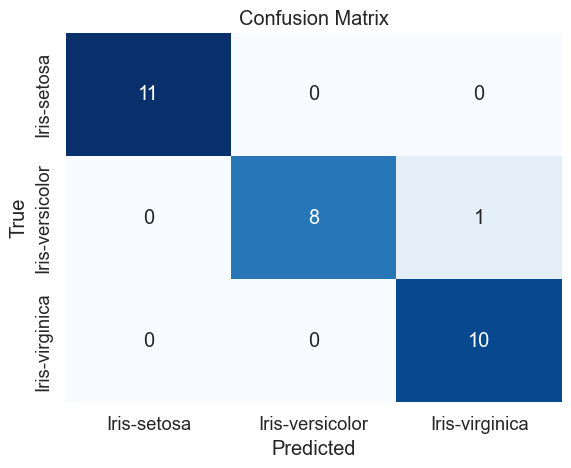

In [20]:
import matplotlib.pyplot as plt

# Create an empty confusion matrix with 3x3 dimensions (since there are 3 classes in the Iris dataset)
confusion_matrix = [[0 for x in range(3)] for y in range(3)]

# Loop through each test instance and update the corresponding cell in the confusion matrix
for i in range(len(y_test)):
    if y_test[i] == 'Iris-setosa':
        if y_pred[i] == 'Iris-setosa':
            confusion_matrix[0][0] += 1
        elif y_pred[i] == 'Iris-versicolor':
            confusion_matrix[0][1] += 1
        elif y_pred[i] == 'Iris-virginica':
            confusion_matrix[0][2] += 1
    elif y_test[i] == 'Iris-versicolor':
        if y_pred[i] == 'Iris-setosa':
            confusion_matrix[1][0] += 1
        elif y_pred[i] == 'Iris-versicolor':
            confusion_matrix[1][1] += 1
        elif y_pred[i] == 'Iris-virginica':
            confusion_matrix[1][2] += 1
    elif y_test[i] == 'Iris-virginica':
        if y_pred[i] == 'Iris-setosa':
            confusion_matrix[2][0] += 1
        elif y_pred[i] == 'Iris-versicolor':
            confusion_matrix[2][1] += 1
        elif y_pred[i] == 'Iris-virginica':
            confusion_matrix[2][2] += 1

# Print the confusion matrix
print("Confusion Matrix:",confusion_matrix)

# Define the class names
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Create the heatmap
sns.set(font_scale=1.2)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', cbar=False, fmt='g', 
                 xticklabels=class_names, yticklabels=class_names)

# Set the axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

In [21]:


# Calculate true positives, true negatives, false positives, and false negatives
tp = confusion_matrix[0][0]
tn = confusion_matrix[1][1] + confusion_matrix[1][2] + confusion_matrix[2][1] + confusion_matrix[2][2]
fp = confusion_matrix[1][0] + confusion_matrix[2][0]
fn = confusion_matrix[0][1] + confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][1]

# Calculate accuracy, precision, recall, and F1 score
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)  
f1_score = 2 * precision * recall / (precision + recall)

# Print the results
print(f"True positives: {tp}")
print(f"True negatives: {tn}")
print(f"False positives: {fp}")
print(f"False negatives: {fn}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1_score:.2f}")


True positives: 11
True negatives: 19
False positives: 0
False negatives: 1
Accuracy: 0.97
Precision: 1.00
Recall: 0.92
F1 score: 0.96


In [22]:

# Hyperparameter tuning
best_accuracy = 0
best_k = 0
for k in range(1, 21):
    # Train model
    y_pred_train = knn_predict(train_set, list(zip(X_train, y_train)), k=k)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    # Validate model
    y_pred_val = knn_predict(train_set, val_set, k=k)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    
    # Update best model
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_k = k
        
# Train best model
y_pred_train = knn_predict(train_set, train_set, k=best_k)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train accuracy: {accuracy_train:.2f} (k={best_k})")

# Test best model
X_test_list = [list(x) for x in X_test]
test_set = list(zip(X_test_list, y_test))
y_pred = knn_predict(train_set, test_set, k=best_k)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f} (k={best_k})")

print(f"Best_k:",best_k)

Train accuracy: 0.97 (k=7)
Test accuracy: 0.97 (k=7)
Best_k: 7
